In [3]:
%matplotlib inline

# Errorbar Plots in matplotlib

## Sections

- [Standard Deviation, Standard Error, and Confidence Intervals](#Standard-Deviation,-Standard-Error,-and-Confidence-Intervals)
- [Adding error bars to a barplot](#Adding-error-bars-to-a-barplot)

<br>
<br>

# Standard Deviation, Standard Error, and Confidence Intervals

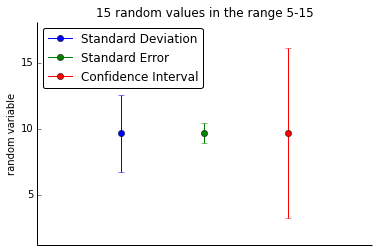

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import t

# Generating 15 random data points in the range 5-15 (inclusive)
X = np.random.randint(5, 15, 15)

# sample size
n = X.size

# mean
X_mean = np.mean(X)

# standard deviation
X_std = np.std(X)

# standard error
X_se = X_std / np.sqrt(n)
# alternatively:
#    from scipy import stats
#    stats.sem(X)

# 95% Confidence Interval

dof = n - 1         # degrees of freedom
alpha = 1.0 - 0.95
conf_interval = t.ppf(1-alpha/2., dof) * X_std*np.sqrt(1.+1./n)

fig = plt.gca()
plt.errorbar(1, X_mean, yerr=X_std, fmt='-o')
plt.errorbar(2, X_mean, yerr=X_se, fmt='-o')
plt.errorbar(3, X_mean, yerr=conf_interval, fmt='-o')

plt.xlim([0,4])
plt.ylim(X_mean-conf_interval-2, X_mean+conf_interval+2)

# axis formatting
fig.axes.get_xaxis().set_visible(False)
fig.spines["top"].set_visible(False)  
fig.spines["right"].set_visible(False)  
plt.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="on", left="on", right="off", labelleft="on")  

plt.legend(['Standard Deviation', 'Standard Error', 'Confidence Interval'], 
           loc='upper left',
           numpoints=1,
           fancybox=True)

plt.ylabel('random variable')
plt.title('15 random values in the range 5-15')

plt.show()

<br>
<br>

# Adding error bars to a barplot

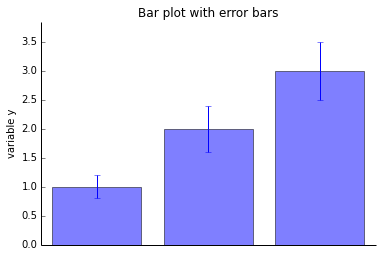

In [7]:
import matplotlib.pyplot as plt

# input data
mean_values = [1, 2, 3]
variance = [0.2, 0.4, 0.5]
bar_labels = ['bar 1', 'bar 2', 'bar 3']

fig = plt.gca()

# plot bars
x_pos = list(range(len(bar_labels)))
plt.bar(x_pos, mean_values, yerr=variance, align='center', alpha=0.5)

# set height of the y-axis
max_y = max(zip(mean_values, variance)) # returns a tuple, here: (3, 5)
plt.ylim([0, (max_y[0] + max_y[1]) * 1.1])

# set axes labels and title
plt.ylabel('variable y')
plt.xticks(x_pos, bar_labels)
plt.title('Bar plot with error bars')

# axis formatting
fig.axes.get_xaxis().set_visible(False)
fig.spines["top"].set_visible(False)  
fig.spines["right"].set_visible(False)  
plt.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="on", left="on", right="off", labelleft="on")  

plt.show()